In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
#data=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/k_circle_sales.csv')
data=pd.read_csv('k_circle_sales.csv')

In [3]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3


In [4]:
data.shape

(8523, 13)

In [5]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

In [6]:
# Central Tendency Measures

In [7]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Profit                       float64
dtype: object

In [8]:
data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].astype('object')

In [9]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Profit                       float64
dtype: object

In [10]:
num_data=data.select_dtypes(include=np.number)
num_data.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
0,9.30,0.016047,249.8,3735.1380,11.5
1,5.92,0.019278,48.3,443.4228,14.3


In [11]:
cat_data=data.select_dtypes(exclude=np.number)
cat_data.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 2,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 2,Supermarket Type2


In [12]:
num_data.mean()

Item_Weight            11.676740
Item_Visibility         0.066132
Item_MRP              140.998838
Item_Outlet_Sales    2181.288914
Profit                 13.414514
dtype: float64

In [13]:
num=pd.DataFrame([10,8,3,4,5,6,7,2,9,1,100,200])

In [14]:
num.mean()

0    29.583333
dtype: float64

In [15]:
11*0.2

2.2

In [16]:
num.mean()

0    29.583333
dtype: float64

In [17]:
#trim_mean
import scipy.stats as stats

In [18]:
stats.trim_mean(num,proportiontocut=0.2)

array([6.5])

In [19]:
stats.trimboth(num,proportiontocut=0.2)

array([[ 3],
       [ 5],
       [ 4],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [20]:
stats.trimboth(num,proportiontocut=0.2).mean()

6.5

In [21]:
stats.trim1(num,proportiontocut=0.2,tail='right')

array([[ 1],
       [ 2],
       [ 7],
       [ 4],
       [ 5],
       [ 6],
       [ 3],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [22]:
stats.trim1(num,proportiontocut=0.2,tail='right').mean()

5.5

In [23]:
tme=stats.trim_mean(num_data,proportiontocut=0.1)

In [24]:
me=num_data.mean()

In [25]:
res=pd.DataFrame()
res['Mean']=me
res['Trim_Mean']=tme
res

,Mean,Trim_Mean
Item_Weight,11.676740,12.892137
Item_Visibility,0.066132,0.060344
Item_MRP,140.998838,139.706731
Item_Outlet_Sales,2181.288914,1971.326788
Profit,13.414514,13.744640


In [26]:
res['Median']=num_data.median()

In [27]:
res

,Mean,Trim_Mean,Median
Item_Weight,11.676740,12.892137,11.800000
Item_Visibility,0.066132,0.060344,0.053931
Item_MRP,140.998838,139.706731,142.700000
Item_Outlet_Sales,2181.288914,1971.326788,1794.331000
Profit,13.414514,13.744640,13.900000


In [28]:
#Measure dispersion

# Class A Mean 75, deviation 40
# Class B Mean 70, deviation 10


In [29]:
#1. Variance     =>    sum ((xi-xmean)^2 )/ N
#2. Standard Deviation  =>  sqrt(sum ((xi-xmean)^2 )/ N)
#3. Coefficient of Variance =>std(x)/mean(x)

In [30]:
num_data.var()

Item_Weight          3.337201e+01
Item_Visibility      2.662335e-03
Item_MRP             3.876071e+03
Item_Outlet_Sales    2.912141e+06
Profit               2.896258e+00
dtype: float64

In [31]:
num_data.std()

Item_Weight             5.776851
Item_Visibility         0.051598
Item_MRP               62.258099
Item_Outlet_Sales    1706.499616
Profit                  1.701840
dtype: float64

In [32]:
num_data.std()/num_data.mean()

Item_Weight          0.494732
Item_Visibility      0.780224
Item_MRP             0.441550
Item_Outlet_Sales    0.782335
Profit               0.126866
dtype: float64

In [33]:
res['varaince']=num_data.var()
res['SD']=num_data.std()
res['coeff_var']=num_data.std()/num_data.mean()

In [34]:
res['range']=num_data.max()-num_data.min()

In [35]:
#Quantiles

In [36]:
# There are 100 students in the class
# Iam capturing marks of 100 studetns

# M1, M2, M3, M4, M5 ----M25------ M95, M96, M97, M98, M99, M100
# M1 is the least mark  and M100 is the maximum mark of the student. 

# 25th percentile value = M25  (say 80 marks)
    #-- 25percent of students scores less than 80 or 75 percent of students scored more than 80

# 75th percentile value = M75  (say 35 marks)
    #-- 25percent of students scores more than 35 or 75 percent of students scored less than than 35

# 50 percentile value = M50 = Median


# M75 - M25  = 35 - 80 = 45  (IQR)
 
# M75 - M25  = 90-80 = 10

In [37]:
res['25th percentile']=num_data.quantile(0.25)
res['50th percentile']=num_data.quantile(0.5)
res['75th percentile']=num_data.quantile(0.75)
res['IQR']=num_data.quantile(0.75) - num_data.quantile(0.25)
res['90th percentile']=num_data.quantile(0.9)

In [38]:
res

,Mean,Trim_Mean,Median,varaince,SD,coeff_var,range,25th percentile,50th percentile,75th percentile,IQR,90th percentile
Item_Weight,11.676740,12.892137,11.800000,3.337201e+01,5.776851,0.494732,21.350000,7.720000,11.800000,16.500000,8.780000,19.250000
Item_Visibility,0.066132,0.060344,0.053931,2.662335e-03,0.051598,0.780224,0.328391,0.026989,0.053931,0.094585,0.067596,0.139514
Item_MRP,140.998838,139.706731,142.700000,3.876071e+03,62.258099,0.441550,235.600000,93.800000,142.700000,185.650000,91.850000,231.200000
Item_Outlet_Sales,2181.288914,1971.326788,1794.331000,2.912141e+06,1706.499616,0.782335,13053.674800,834.247400,1794.331000,3101.296400,2267.049000,4570.051200
Profit,13.414514,13.744640,13.900000,2.896258e+00,1.701840,0.126866,23.900000,13.150000,13.900000,14.300000,1.150000,14.600000


In [39]:
res.shape

(5, 12)

In [40]:
# q1 = 25 th percentile
# q3 = 75 th percentile
# iqr = q3 - q1

# ub = q3 + 1.5*iqr  # upper bound outlier
# lb = q1 - 1.5*iqr  # Lower bound outlier

# ub= 12 + 1.5 * (12-3) = 25.5

<AxesSubplot:xlabel='Item_Outlet_Sales'>

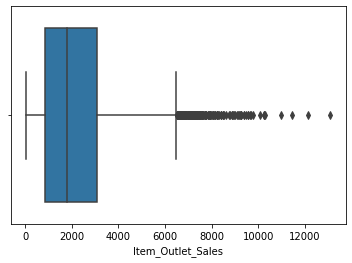

In [41]:
sb.boxplot(num_data['Item_Outlet_Sales'])

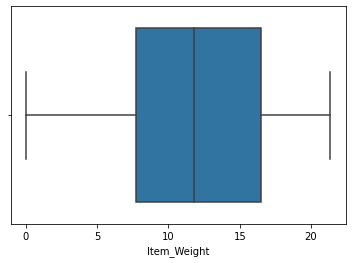

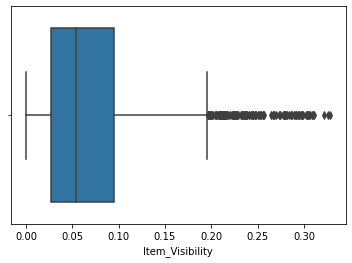

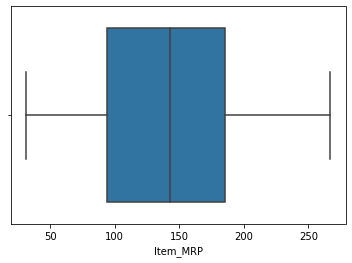

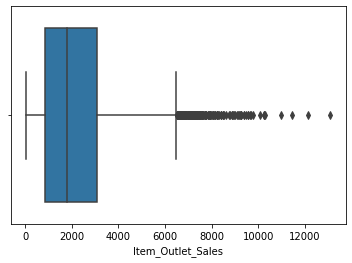

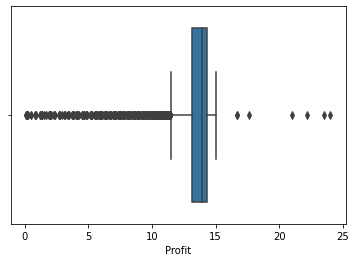

In [42]:
for i in num_data.columns:
    sb.boxplot(num_data[i])
    plt.show()

In [43]:
q1=num_data['Profit'].quantile(0.25)
q3=num_data['Profit'].quantile(0.75)
iqr=q3-q1
ub = q3 + 1.5*iqr
lb = q1 - 1.5*iqr
print(lb,ub)

num_data[((num_data['Profit']>ub) | (num_data['Profit']<lb))]

11.424999999999995 16.025000000000006


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
5,10.395,0.000000,51.4,556.6088,9.5
6,13.650,0.012741,57.7,343.5528,8.8
16,11.800,0.008596,115.3,1621.8888,8.6
29,NaN,0.072222,43.6,125.8362,10.8
41,9.800,0.026818,126.0,2150.5340,6.9
...,...,...,...,...,...
8488,0.000,0.091473,184.7,2756.4120,10.5
8498,15.350,0.035293,124.6,1601.2490,11.2
8507,5.880,0.030242,101.8,515.9950,8.8
8508,11.350,0.043246,199.5,2587.9646,10.2


In [44]:
num_data[((num_data['Profit']>ub) | (num_data['Profit']<lb))]

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
5,10.395,0.000000,51.4,556.6088,9.5
6,13.650,0.012741,57.7,343.5528,8.8
16,11.800,0.008596,115.3,1621.8888,8.6
29,NaN,0.072222,43.6,125.8362,10.8
41,9.800,0.026818,126.0,2150.5340,6.9
...,...,...,...,...,...
8488,0.000,0.091473,184.7,2756.4120,10.5
8498,15.350,0.035293,124.6,1601.2490,11.2
8507,5.880,0.030242,101.8,515.9950,8.8
8508,11.350,0.043246,199.5,2587.9646,10.2


In [45]:
cat_data.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 2,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 2,Supermarket Type2


In [46]:
cat_data['Item_Identifier'].nunique()

1559

In [47]:
cat_data['Outlet_Size'].value_counts(normalize=True)

Medium    0.456895
Small     0.390643
High      0.152462
Name: Outlet_Size, dtype: float64

In [48]:
for i in cat_data.columns:
    print(cat_data[i].value_counts(normalize=True)*100)

FDG33    0.117330
FDW13    0.117330
FDU12    0.105597
NCY18    0.105597
FDX04    0.105597
           ...   
FDY43    0.011733
FDN52    0.011733
FDQ60    0.011733
FDO33    0.011733
FDT35    0.011733
Name: Item_Identifier, Length: 1559, dtype: float64
Low Fat    59.709023
Regular    33.896515
LF          3.707615
reg         1.372756
low fat     1.314091
Name: Item_Fat_Content, dtype: float64
Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: Item_Type, dtype: float64
OUT027    10.9

In [49]:
cat_data['Item_Fat_Content']=cat_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [50]:
cat_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

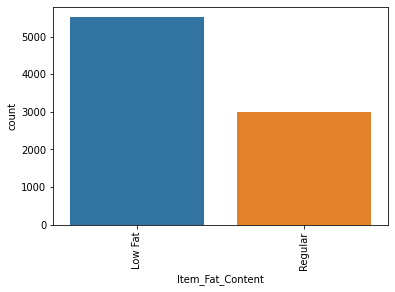

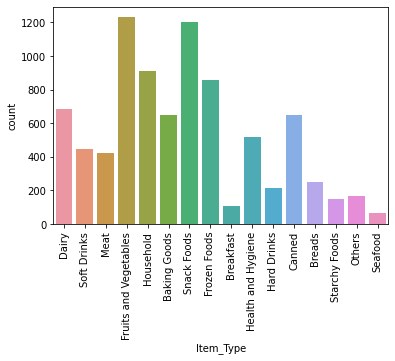

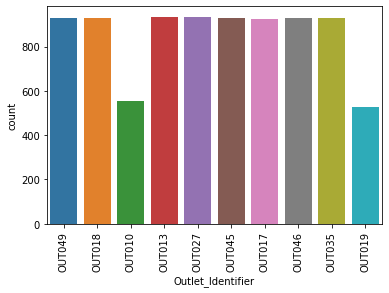

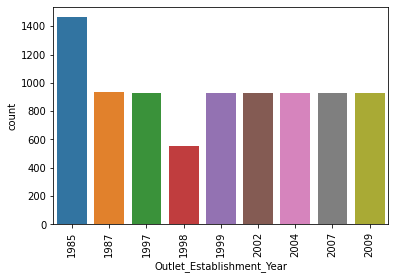

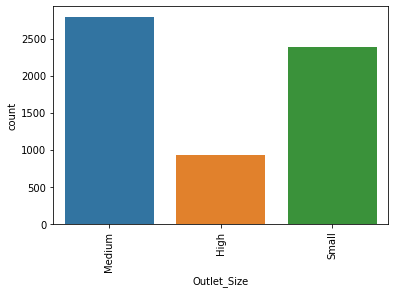

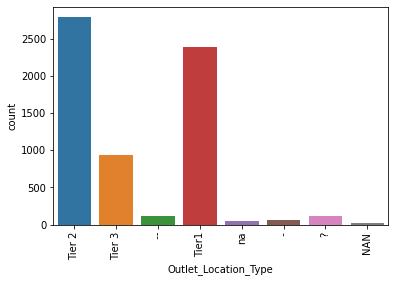

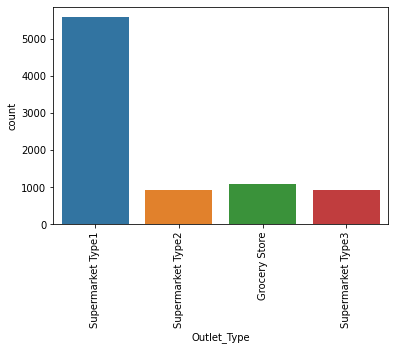

In [51]:
for i in cat_data.columns[1:]:
    plt.xticks(rotation=90)
    sb.countplot(cat_data[i])
    plt.show()

In [52]:
cat_data.mode()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDG33,Low Fat,Fruits and Vegetables,OUT027,1985,Medium,Tier 2,Supermarket Type1
1,FDW13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


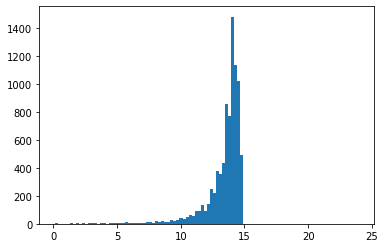

In [53]:
#Distribution
plt.hist(data['Profit'],bins=100)
plt.show()

In [54]:
print(data['Profit'].mean(),data['Profit'].median(),data['Profit'].mode())

13.41451366889597 13.9 0    14.3
dtype: float64


<AxesSubplot:ylabel='Density'>

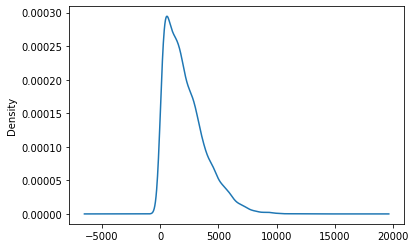

In [55]:
data['Item_Outlet_Sales'].plot(kind='kde')

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <BarContainer object of 10 artists>)

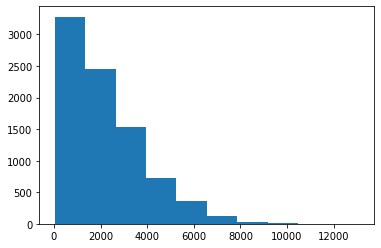

In [56]:
plt.hist(data['Item_Outlet_Sales'])

<AxesSubplot:ylabel='Density'>

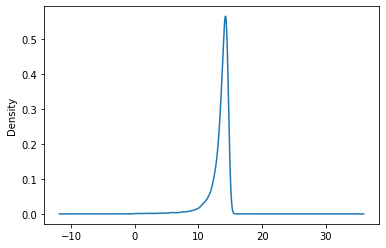

In [57]:
data['Profit'].plot(kind='kde')

In [58]:
num_data.skew()

Item_Weight         -0.352215
Item_Visibility      1.167091
Item_MRP             0.127390
Item_Outlet_Sales    1.177531
Profit              -3.379808
dtype: float64

In [59]:
# Left skewed profit is good for bussiness or not ?


In [60]:
# Profit

In [61]:
print(num_data['Profit'].mode()[0],num_data['Profit'].median(),num_data['Profit'].mean())

14.3 13.9 13.41451366889597


In [62]:
# mode > median >mean

In [63]:
num_data['Item_Weight'].value_counts()

0.000     714
12.150     86
17.600     82
13.650     77
11.800     76
         ... 
5.675       2
9.420       1
6.520       1
7.685       1
5.400       1
Name: Item_Weight, Length: 416, dtype: int64

In [64]:
print(num_data['Item_Weight'].mode()[0],num_data['Item_Weight'].median(),num_data['Item_Weight'].mean())

0.0 11.8 11.67673977360451


In [65]:
# 12.15 , 11.8, 11.6 Mode > Median> mean

In [66]:
print(num_data['Item_Outlet_Sales'].mode()[0],num_data['Item_Outlet_Sales'].median(),num_data['Item_Outlet_Sales'].mean())

958.752 1794.3310000000001 2181.2889135750365


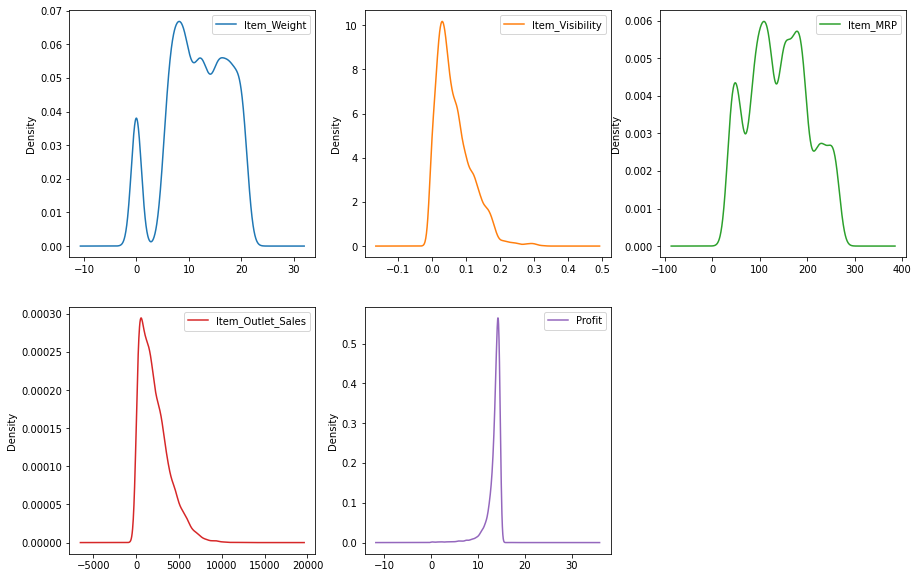

In [67]:
num_data.plot(kind='kde',subplots=True,layout=(2,3),sharex=False,figsize=(15,10))
plt.show()

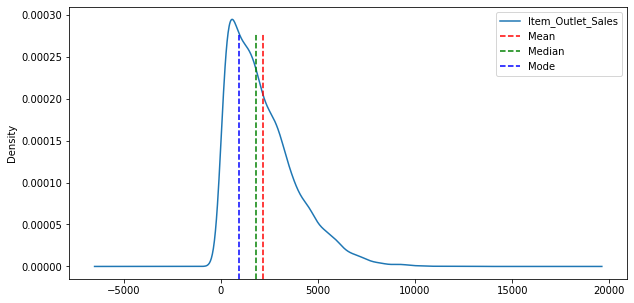

In [68]:
num_data['Item_Outlet_Sales'].plot(kind='kde',figsize=(10,5))
plt.axvline(x=num_data['Item_Outlet_Sales'].mean(),color='red',linestyle='--',label='Mean',ymax=0.9)
plt.axvline(x=num_data['Item_Outlet_Sales'].median(),color='green',linestyle='--',label='Median',ymax=0.9)
plt.axvline(x=num_data['Item_Outlet_Sales'].mode()[0],color='blue',linestyle='--',label='Mode',ymax=0.9)
plt.legend()

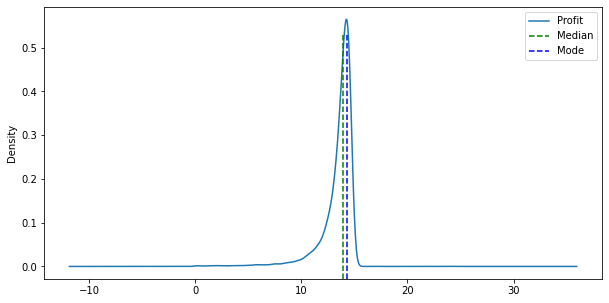

In [69]:
num_data['Profit'].plot(kind='kde',figsize=(10,5))


plt.axvline(x=num_data['Profit'].median(),color='green',linestyle='--',label='Median',ymax=0.9)
plt.axvline(x=num_data['Profit'].mode()[0],color='blue',linestyle='--',label='Mode',ymax=0.9)
plt.legend()

In [70]:
# Measure of peakedness  -   Debatable

# Measure of tailedness 

In [71]:
num_data.kurt()

Item_Weight          -0.613755
Item_Visibility       1.679445
Item_MRP             -0.887901
Item_Outlet_Sales     1.615877
Profit               16.965881
dtype: float64

In [72]:
# sum (xi-xmean)^2 / N-1  - variance
 
# sum (xi - xmean)*(yi - ymean) / N-1   --- Covariance

In [73]:
num_data.cov()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
Item_Weight,33.372008,-0.016030,7.425851,-3.295708e+02,-0.160196
Item_Visibility,-0.016030,0.002662,-0.005131,-1.132561e+01,0.001253
Item_MRP,7.425851,-0.005131,3876.070885,6.029901e+04,0.435364
Item_Outlet_Sales,-329.570782,-11.325611,60299.006078,2.912141e+06,2.762921
Profit,-0.160196,0.001253,0.435364,2.762921e+00,2.896258


In [74]:
num_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
Item_Weight,1.000000,-0.055081,0.020616,-0.034997,-0.016058
Item_Visibility,-0.055081,1.000000,-0.001597,-0.128625,0.014269
Item_MRP,0.020616,-0.001597,1.000000,0.567555,0.004109
Item_Outlet_Sales,-0.034997,-0.128625,0.567555,1.000000,0.000951
Profit,-0.016058,0.014269,0.004109,0.000951,1.000000


<AxesSubplot:>

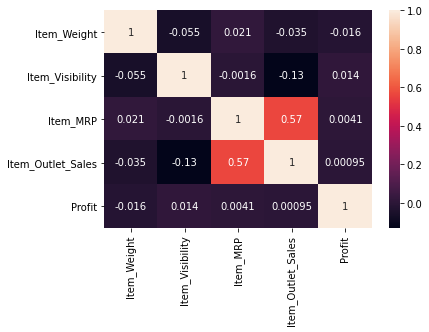

In [75]:
sb.heatmap(num_data.corr(),annot=True)

In [76]:
# x1, x2 = 0.7
# x3, x4 = -0.8

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

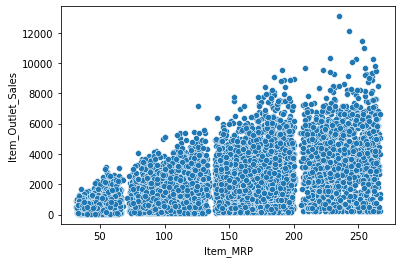

In [77]:
sb.scatterplot(data['Item_MRP'],data['Item_Outlet_Sales'])

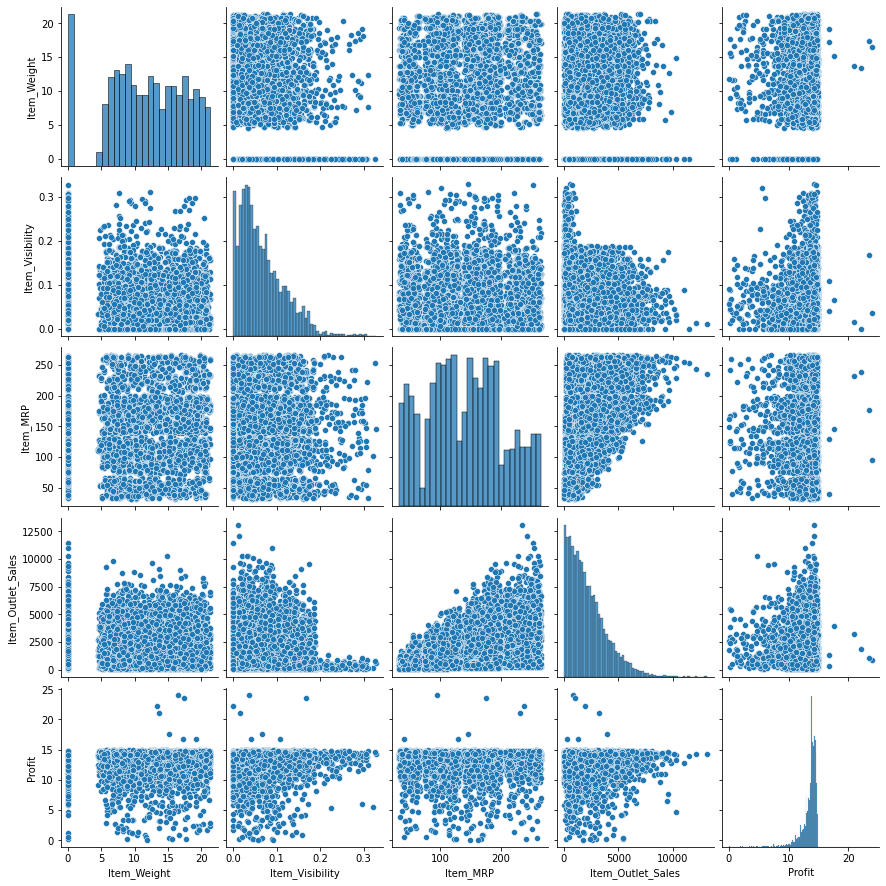

In [78]:
sb.pairplot(num_data)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

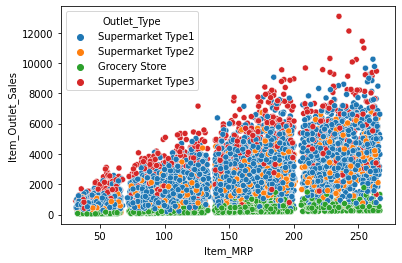

In [79]:
sb.scatterplot(data['Item_MRP'],data['Item_Outlet_Sales'],hue=data['Outlet_Type'])

In [80]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Item_MRP', ylabel='Profit'>

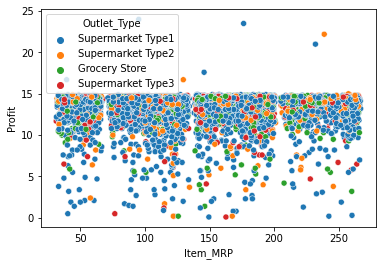

In [81]:
sb.scatterplot(data['Item_MRP'],data['Profit'],hue=data['Outlet_Type'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Profit'>

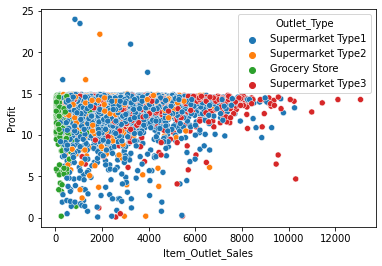

In [82]:
sb.scatterplot(data['Item_Outlet_Sales'],data['Profit'],hue=data['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

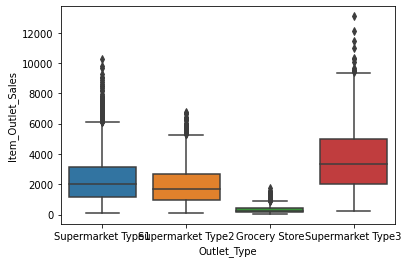

In [83]:
sb.boxplot(data['Outlet_Type'], data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Profit'>

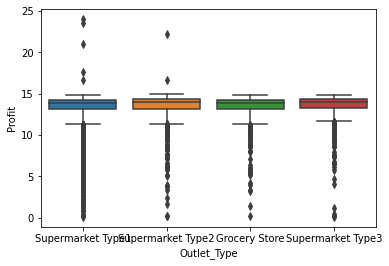

In [84]:
sb.boxplot(data['Outlet_Type'], data['Profit'])

In [85]:
data.groupby('Outlet_Type')['Profit'].mean()

Outlet_Type
Grocery Store        13.411727
Supermarket Type1    13.399032
Supermarket Type2    13.412392
Supermarket Type3    13.512193
Name: Profit, dtype: float64

In [86]:
data['Outlet_Type'].value_counts(normalize=True)

Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: Outlet_Type, dtype: float64

In [87]:
data.groupby(['Outlet_Type','Item_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type        Item_Type    
Grocery Store      Baking Goods      292.082544
                   Breads            381.967442
                   Breakfast         412.831042
                   Canned            352.864879
                   Dairy             341.866589
                                       ...     
Supermarket Type3  Others           2700.928667
                   Seafood          2687.073686
                   Snack Foods      3745.168739
                   Soft Drinks      3284.938836
                   Starchy Foods    3512.190114
Name: Item_Outlet_Sales, Length: 64, dtype: float64

In [88]:
data.groupby(['Outlet_Type','Item_Fat_Content']).agg({'Item_Outlet_Sales':'mean','Profit':'mean'})

Item_Outlet_Sales     Profit
Outlet_Type       Item_Fat_Content                              
Grocery Store     LF                       341.451831  13.220000
                  Low Fat                  341.981636  13.430374
                  Regular                  336.225342  13.393407
                  low fat                  320.212811  13.400000
                  reg                      354.776286  13.664286
Supermarket Type1 LF                      2257.346352  13.332292
                  Low Fat                 2288.925712  13.430326
                  Regular                 2374.807091  13.347909
                  low fat                 2329.653223  13.260000
                  reg                     2200.140314  13.581013
Supermarket Type2 LF                      2183.665476  13.326190
                  Low Fat                 1994.942504  13.431444
                  Regular                 1973.360779  13.376923
                  low fat                 2039.715289  13.822222
                  reg                     1934.962756  13.444444
Supermarket Type3 LF                      3101.422362  13.302703
                  Low Fat                 3694.764996  13.493490
                  Regular                 3806.695060  13.554938
                  low fat                 3108.664587  13.633333
                  reg                     2661.535500  13.916667

In [89]:
pd.crosstab(data['Item_Type'],data['Outlet_Size'])/data['Outlet_Size'].value_counts()*100

,High,Medium,Small
Item_Type,,,
Baking Goods,7.832618,7.268170,7.830821
Breads,2.682403,2.971715,2.973199
Breakfast,1.394850,1.288937,1.256281
Canned,6.974249,7.769424,7.914573
Dairy,8.583691,7.805227,8.291457
Frozen Foods,9.871245,9.810240,10.427136
Fruits and Vegetables,15.236052,14.786967,13.735343
Hard Drinks,2.467811,2.685285,2.093802
Health and Hygiene,6.545064,6.086645,5.695142


In [90]:
tab=pd.crosstab(data['Item_Type'],data['Outlet_Size'])/data['Outlet_Size'].value_counts()*100

<AxesSubplot:xlabel='Item_Type'>

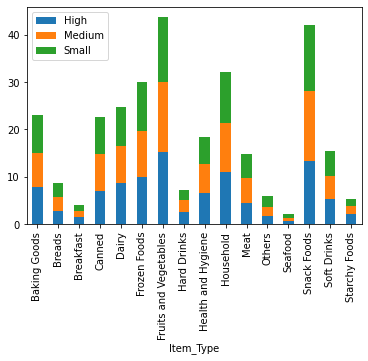

In [91]:
tab.plot(kind='bar',stacked=True)

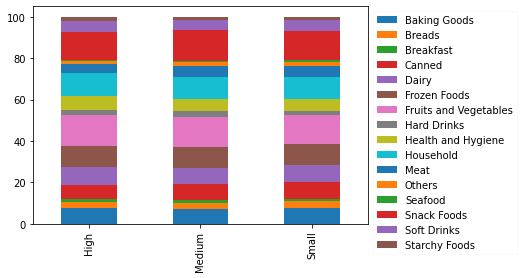

In [92]:
(tab.T).plot(kind='bar',stacked=True)
plt.legend(framealpha=0.1,bbox_to_anchor=(1,0,0.1,1))

In [93]:
# Preprocessing
# Encoding

In [94]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3


In [95]:
# Cat Data --> Nominal or Ordinal

# Ordinal --- Integer Encoding (LabelEncoding, Ordinal Encoding, Replace)
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [96]:
# small =0, Medium = 1, High =2 (allowed, preferrable)
# small =2, Medium = 1, High =0 (allowed)
# small =1, Medium =0, High =2 (wrong)

In [97]:
data1=data.dropna()

In [98]:
data1['Outlet_Size_replace']=data1['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2})

In [99]:
data1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Outlet_Size_replace
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1


In [100]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data1['Item_Fat_Content_label']=le.fit_transform(data1['Item_Fat_Content'])

In [101]:
data1[['Item_Fat_Content','Item_Fat_Content_label']].head(2)

,Item_Fat_Content,Item_Fat_Content_label
0,Low Fat,1
1,Regular,2


In [102]:
data1['Item_Fat_Content_label'].value_counts()

1    3192
2    1828
0     204
4      76
3      64
Name: Item_Fat_Content_label, dtype: int64

In [103]:
data1['Item_Fat_Content'].value_counts()

Low Fat    3192
Regular    1828
LF          204
reg          76
low fat      64
Name: Item_Fat_Content, dtype: int64

In [104]:
data1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Grocery Store'], dtype=object)

In [105]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Grocery Store','Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']])
data1['Outlet_Type_Order']=oe.fit_transform(data1['Outlet_Type'].values.reshape(-1,1))

In [106]:
#data1['Outlet_Type'].values.reshape(5364,1).shape

In [107]:
data1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Outlet_Size_replace,Item_Fat_Content_label,Outlet_Type_Order
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1,1,1.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1,2,2.0


In [108]:
# Nominal Data

In [109]:
data1['Outlet_Identifier'].value_counts()

OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT018    928
OUT027    456
OUT019    258
Name: Outlet_Identifier, dtype: int64

In [110]:
data1=pd.get_dummies(data1,columns=['Outlet_Identifier'],drop_first=True)

In [111]:
data1.groupby('Item_Identifier')['Item_Outlet_Sales'].mean()

Item_Identifier
DRA12    1465.425800
DRA24    3439.522800
DRA59    3553.774080
DRB01    1518.024000
DRB13    2593.291000
            ...     
NCZ30    1887.986867
NCZ41    1502.044800
NCZ42    4819.504267
NCZ53    3674.217300
NCZ54    3655.242000
Name: Item_Outlet_Sales, Length: 1546, dtype: float64

In [112]:
data1['Item_Identifier_Target_encoding']=data1.groupby('Item_Identifier')['Item_Outlet_Sales'].transform('mean')

In [113]:
# Frequency Encoding

In [114]:
freq=data1['Item_Type'].value_counts()
freq

Fruits and Vegetables    778
Snack Foods              763
Household                582
Frozen Foods             540
Dairy                    434
Canned                   411
Baking Goods             402
Health and Hygiene       323
Soft Drinks              269
Meat                     267
Breads                   155
Hard Drinks              128
Others                   105
Starchy Foods             97
Breakfast                 72
Seafood                   38
Name: Item_Type, dtype: int64

In [115]:
data1['Item_Type_freq_encoding']=data1['Item_Type'].map(freq)

In [116]:
data1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Fat_Content_label,Outlet_Type_Order,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_Target_encoding,Item_Type_freq_encoding
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,1999,Medium,Tier 2,Supermarket Type1,...,1,1.0,0,0,0,0,0,1,5664.959300,434
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,2009,Medium,Tier 2,Supermarket Type2,...,2,2.0,1,0,0,0,0,0,509.115067,269


In [117]:
data1=pd.get_dummies(data1,columns=['Outlet_Location_Type'])

In [118]:
data1['Age']=2020-data1['Outlet_Establishment_Year']

In [119]:
data1['Age']=data1['Age'].astype('int')

In [120]:
cat_col=data1.select_dtypes(exclude=np.number).columns

In [121]:
cat_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [122]:
data1=data1.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Type'],1)

In [123]:
data1.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Outlet_Size_replace,Item_Fat_Content_label,Outlet_Type_Order,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_Target_encoding,Item_Type_freq_encoding,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Age
0,9.30,0.016047,249.8,3735.1380,11.5,1,1,1.0,0,0,0,0,0,1,5664.959300,434,1,0,0,21
1,5.92,0.019278,48.3,443.4228,14.3,1,2,2.0,1,0,0,0,0,0,509.115067,269,1,0,0,11


In [124]:
#Scaling

In [125]:
# Standard Scaling
# xi - xmean() / x_std

In [126]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data1_sc=sc.fit_transform(data1)

In [127]:
data1_sc

array([[-3.04824919e-01, -9.74071052e-01,  1.73534795e+00, ...,
        -4.58572577e-01, -8.07771861e-01, -2.02194701e-01],
       [-8.52355179e-01, -9.06708460e-01, -1.49698491e+00, ...,
        -4.58572577e-01, -8.07771861e-01, -1.39272420e+00],
       [ 1.02350293e+00, -9.59210152e-01, -3.26568955e-04, ...,
        -4.58572577e-01, -8.07771861e-01, -2.02194701e-01],
       ...,
       [-9.42363578e-02, -5.75035290e-01, -9.06663080e-01, ...,
        -4.58572577e-01,  1.23797330e+00, -7.97459450e-01],
       [-6.43386529e-01,  1.71911381e+00, -6.17918705e-01, ...,
        -4.58572577e-01, -8.07771861e-01, -1.39272420e+00],
       [ 5.86126687e-01, -3.72962859e-01, -1.06066008e+00, ...,
        -4.58572577e-01,  1.23797330e+00,  3.59111993e-02]])

In [128]:
from scipy.stats import zscore
zscore(data1)

array([[-3.04824919e-01, -9.74071052e-01,  1.73534795e+00, ...,
        -4.58572577e-01, -8.07771861e-01, -2.02194701e-01],
       [-8.52355179e-01, -9.06708460e-01, -1.49698491e+00, ...,
        -4.58572577e-01, -8.07771861e-01, -1.39272420e+00],
       [ 1.02350293e+00, -9.59210152e-01, -3.26568955e-04, ...,
        -4.58572577e-01, -8.07771861e-01, -2.02194701e-01],
       ...,
       [-9.42363578e-02, -5.75035290e-01, -9.06663080e-01, ...,
        -4.58572577e-01,  1.23797330e+00, -7.97459450e-01],
       [-6.43386529e-01,  1.71911381e+00, -6.17918705e-01, ...,
        -4.58572577e-01, -8.07771861e-01, -1.39272420e+00],
       [ 5.86126687e-01, -3.72962859e-01, -1.06066008e+00, ...,
        -4.58572577e-01,  1.23797330e+00,  3.59111993e-02]])

In [129]:
data1_sc=pd.DataFrame(data1_sc,columns=data1.columns,index=data1.index)

In [130]:
data1_sc.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Outlet_Size_replace,Item_Fat_Content_label,Outlet_Type_Order,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_Target_encoding,Item_Type_freq_encoding,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Age
0,-0.304825,-0.974071,1.735348,0.872825,-1.130518,0.306699,-0.571068,-0.428305,-0.457381,-0.224786,-0.304811,-0.457977,-0.457977,2.183516,2.747287,-0.277098,1.14807,-0.458573,-0.807772,-0.202195
1,-0.852355,-0.906708,-1.496985,-1.134523,0.523370,0.306699,0.976006,1.023924,2.186361,-0.224786,-0.304811,-0.457977,-0.457977,-0.457977,-1.466972,-1.033728,1.14807,-0.458573,-0.807772,-1.392724


In [131]:
data1_sc.shape

(5364, 20)

In [132]:
sales=pd.concat([data1['Item_Outlet_Sales'],data1_sc['Item_Outlet_Sales']],1)

<function matplotlib.pyplot.show(close=None, block=None)>

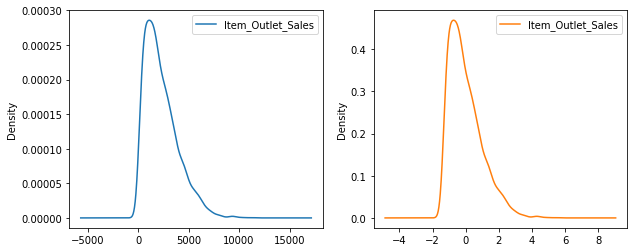

In [133]:
sales=pd.concat([data1['Item_Outlet_Sales'],data1_sc['Item_Outlet_Sales']],1)
sales.plot(kind='kde',subplots=True,layout=(1,2),sharex=False,figsize=(10,4))
plt.show

In [134]:
data1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Outlet_Size_replace,Item_Fat_Content_label,Outlet_Type_Order,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_Target_encoding,Item_Type_freq_encoding,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Age
count,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000
mean,11.181738,0.062767,141.620358,2303.850834,13.413945,0.778896,1.369128,1.294929,0.173005,0.048098,0.085011,0.173378,0.173378,0.173378,2303.850834,494.427293,0.431394,0.173751,0.394855,22.698359
std,6.173750,0.047968,62.344688,1639.985035,1.693138,0.720982,0.646442,0.688661,0.378287,0.213994,0.278924,0.378609,0.378609,0.378609,1223.542455,218.092486,0.495317,0.378930,0.488865,8.400407
min,0.000000,0.000000,31.500000,34.621600,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.600800,38.000000,0.000000,0.000000,0.000000,11.000000
25%,7.235000,0.026295,94.300000,1034.653200,13.100000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1355.235900,323.000000,0.000000,0.000000,0.000000,16.000000
50%,11.500000,0.051753,143.000000,1936.479300,13.900000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2119.374560,434.000000,0.000000,0.000000,0.000000,21.000000
75%,16.350000,0.090802,186.400000,3200.500600,14.300000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3140.079250,763.000000,1.000000,0.000000,1.000000,33.000000
max,21.350000,0.325781,266.900000,11445.102000,22.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9227.988000,778.000000,1.000000,1.000000,1.000000,35.000000


In [135]:
data1_sc.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Outlet_Size_replace,Item_Fat_Content_label,Outlet_Type_Order,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_Target_encoding,Item_Type_freq_encoding,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Age
count,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03,5.364000e+03
mean,8.243882e-17,2.107954e-16,-2.945692e-16,-1.182458e-16,-4.902243e-16,-7.645719e-17,-2.916302e-17,2.421627e-17,-1.265973e-16,3.657692e-16,1.393636e-15,-1.812495e-16,-4.805171e-16,1.949928e-16,2.630467e-16,-8.200417e-16,1.223688e-15,-1.110285e-15,-5.588371e-18,3.950668e-16
std,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00
min,-1.811343e+00,-1.308647e+00,-1.766480e+00,-1.383818e+00,-7.864207e+00,-1.080427e+00,-2.118142e+00,-1.880534e+00,-4.573811e-01,-2.247861e-01,-3.048107e-01,-4.579770e-01,-4.579770e-01,-4.579770e-01,-1.841751e+00,-2.093010e+00,-8.710273e-01,-4.585726e-01,-8.077719e-01,-1.392724e+00
25%,-6.393367e-01,-7.604154e-01,-7.590826e-01,-7.739802e-01,-1.854392e-01,-1.080427e+00,-5.710676e-01,-4.283047e-01,-4.573811e-01,-2.247861e-01,-3.048107e-01,-4.579770e-01,-4.579770e-01,-4.579770e-01,-7.753743e-01,-7.861035e-01,-8.710273e-01,-4.585726e-01,-8.077719e-01,-7.974595e-01
50%,5.155572e-02,-2.296236e-01,2.213133e-02,-2.240300e-01,2.871004e-01,3.066986e-01,-5.710676e-01,-4.283047e-01,-4.573811e-01,-2.247861e-01,-3.048107e-01,-4.579770e-01,-4.579770e-01,-4.579770e-01,-1.507863e-01,-2.770977e-01,-8.710273e-01,-4.585726e-01,-8.077719e-01,-2.021947e-01
75%,8.372130e-01,5.845247e-01,7.183261e-01,5.467936e-01,5.233701e-01,3.066986e-01,9.760064e-01,1.023924e+00,-4.573811e-01,-2.247861e-01,-3.048107e-01,-4.579770e-01,-4.579770e-01,-4.579770e-01,6.835123e-01,1.231577e+00,1.148070e+00,-4.585726e-01,1.237973e+00,1.226441e+00
max,1.647169e+00,5.483682e+00,2.009655e+00,5.574504e+00,5.189698e+00,1.693824e+00,4.070155e+00,2.476154e+00,2.186361e+00,4.448674e+00,3.280725e+00,2.183516e+00,2.183516e+00,2.183516e+00,5.659618e+00,1.300362e+00,1.148070e+00,2.180680e+00,1.237973e+00,1.464547e+00


In [136]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
data1_mm=mm.fit_transform(data1)
data1_mm=pd.DataFrame(data1_mm,columns=data1.columns,index=data1.index)

<function matplotlib.pyplot.show(close=None, block=None)>

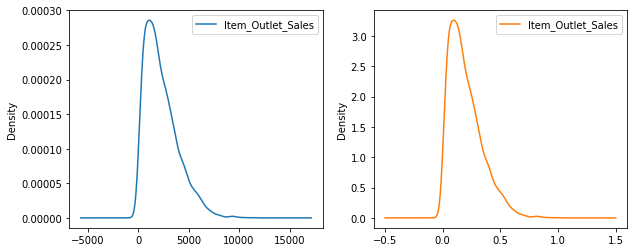

In [137]:
sales=pd.concat([data1['Item_Outlet_Sales'],data1_mm['Item_Outlet_Sales']],1)
sales.plot(kind='kde',subplots=True,layout=(1,2),sharex=False,figsize=(10,4))
plt.show

In [138]:
data1_mm.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Outlet_Size_replace,Item_Fat_Content_label,Outlet_Type_Order,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_Target_encoding,Item_Type_freq_encoding,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Age
count,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000
mean,0.523735,0.192665,0.467801,0.198872,0.602441,0.389448,0.342282,0.431643,0.173005,0.048098,0.085011,0.173378,0.173378,0.173378,0.245522,0.616794,0.431394,0.173751,0.394855,0.487432
std,0.289169,0.147239,0.264846,0.143726,0.076613,0.360491,0.161610,0.229554,0.378287,0.213994,0.278924,0.378609,0.378609,0.378609,0.133321,0.294720,0.495317,0.378930,0.488865,0.350017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.338876,0.080713,0.266780,0.087641,0.588235,0.000000,0.250000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142158,0.385135,0.000000,0.000000,0.000000,0.208333
50%,0.538642,0.158859,0.473662,0.166676,0.624434,0.500000,0.250000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225421,0.535135,0.000000,0.000000,0.000000,0.416667
75%,0.765808,0.278722,0.658029,0.277454,0.642534,0.500000,0.500000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.336640,0.979730,1.000000,0.000000,1.000000,0.916667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()
data1_rb=rb.fit_transform(data1)
data1_rb=pd.DataFrame(data1_rb,columns=data1.columns,index=data1.index)

<function matplotlib.pyplot.show(close=None, block=None)>

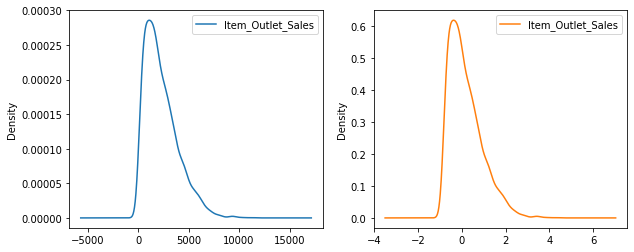

In [140]:
sales=pd.concat([data1['Item_Outlet_Sales'],data1_rb['Item_Outlet_Sales']],1)
sales.plot(kind='kde',subplots=True,layout=(1,2),sharex=False,figsize=(10,4))
plt.show

In [141]:
data1_rb.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Outlet_Size_replace,Item_Fat_Content_label,Outlet_Type_Order,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_Target_encoding,Item_Type_freq_encoding,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Age
count,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000,5364.000000
mean,-0.034916,0.170731,-0.014980,0.169620,-0.405046,-0.221104,0.369128,0.294929,0.173005,0.048098,0.085011,0.173378,0.173378,0.173378,0.103357,0.137335,0.431394,0.173751,0.394855,0.099903
std,0.677318,0.743597,0.676924,0.757202,1.410948,0.720982,0.646442,0.688661,0.378287,0.213994,0.278924,0.378609,0.378609,0.378609,0.685518,0.495665,0.495317,0.378930,0.488865,0.494142
min,-1.261657,-0.802284,-1.210641,-0.878113,-11.500000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.159079,-0.900000,0.000000,0.000000,0.000000,-0.588235
25%,-0.467910,-0.394658,-0.528773,-0.416385,-0.666667,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.428126,-0.252273,0.000000,0.000000,0.000000,-0.294118
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.532090,0.605342,0.471227,0.583615,0.333333,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571874,0.747727,1.000000,0.000000,1.000000,0.705882
max,1.080636,4.248000,1.345277,4.390255,6.916667,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.982766,0.781818,1.000000,1.000000,1.000000,0.823529


In [142]:
from sklearn.preprocessing import Normalizer
nm=Normalizer(norm='l2')
data1_nm=nm.fit_transform(data1)
data1_nm=pd.DataFrame(data1_nm,columns=data1.columns,index=data1.index)

<function matplotlib.pyplot.show(close=None, block=None)>

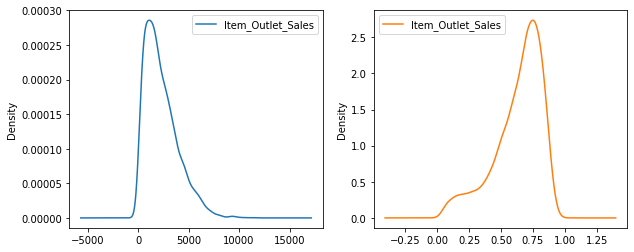

In [143]:
sales=pd.concat([data1['Item_Outlet_Sales'],data1_nm['Item_Outlet_Sales']],1)
sales.plot(kind='kde',subplots=True,layout=(1,2),sharex=False,figsize=(10,4))
plt.show

In [144]:
item_sales=data1['Item_Outlet_Sales']

In [145]:
item_sales.skew()

1.1084763432621911

In [146]:
item_sales_log=np.log(item_sales)

In [147]:
item_sales_log.skew()

-0.8717253508603642

<function matplotlib.pyplot.show(close=None, block=None)>

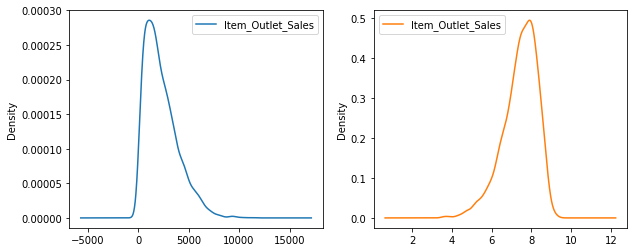

In [148]:
sales=pd.concat([data1['Item_Outlet_Sales'],item_sales_log],1)
sales.plot(kind='kde',subplots=True,layout=(1,2),sharex=False,figsize=(10,4))
plt.show

In [149]:
item_sales_pow=np.power(data1['Item_Outlet_Sales'],0.38)
item_sales_pow.skew()

0.005545445963739586

<function matplotlib.pyplot.show(close=None, block=None)>

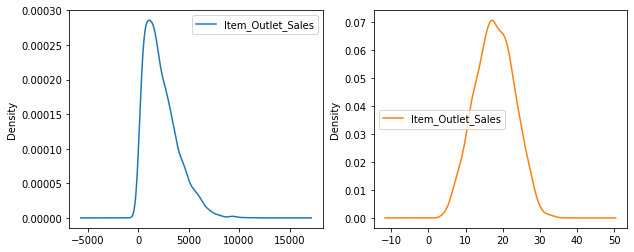

In [150]:
sales=pd.concat([data1['Item_Outlet_Sales'],item_sales_pow],1)
sales.plot(kind='kde',subplots=True,layout=(1,2),sharex=False,figsize=(10,4))
plt.show

Box-cox

x^lam - 1 / lam   if lam >0

log(x)            if lam=0

In [151]:
import scipy.stats
item_sales_box,lam=stats.boxcox(data1['Item_Outlet_Sales'])

In [152]:
pd.DataFrame(item_sales_box).skew()

0   -0.047912
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

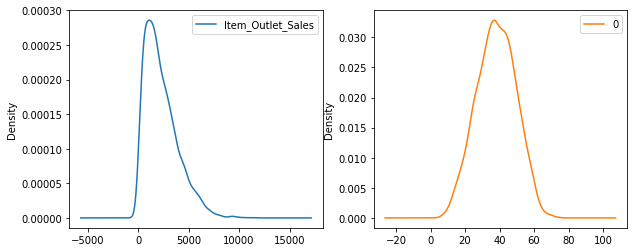

In [153]:
sales=pd.concat([data1['Item_Outlet_Sales'],pd.DataFrame(item_sales_box)],1)
sales.plot(kind='kde',subplots=True,layout=(1,2),sharex=False,figsize=(10,4))
plt.show

In [154]:
#few more visuals

In [155]:
#line chart
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3


<AxesSubplot:xlabel='Outlet_Establishment_Year'>

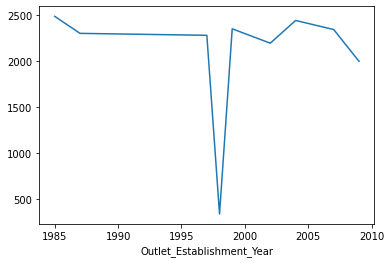

In [156]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot()

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

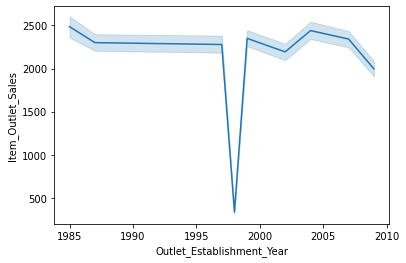

In [157]:
sb.lineplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data)

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

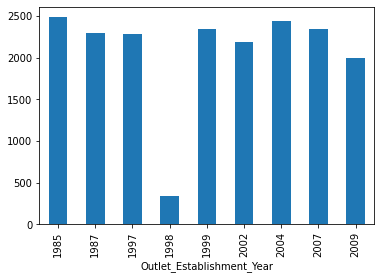

In [158]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

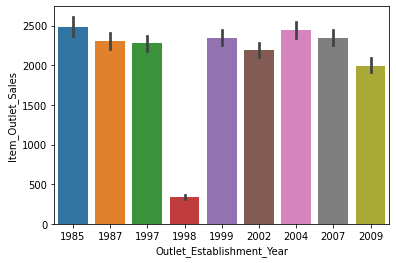

In [159]:
sb.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data)

In [160]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

In [161]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

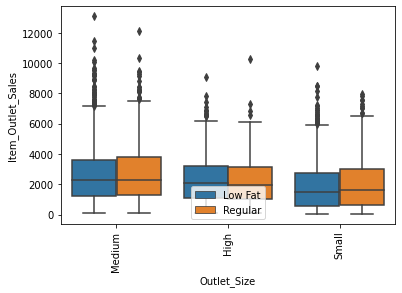

In [162]:
sb.boxplot(x=data['Outlet_Size'],y=data['Item_Outlet_Sales'],hue=data['Item_Fat_Content'])
plt.xticks(rotation=90)
plt.legend(loc=8)

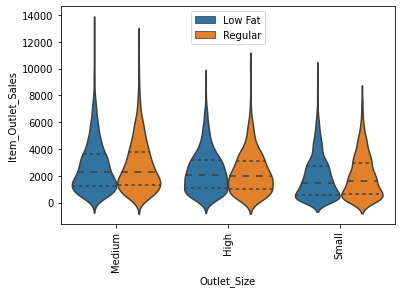

In [163]:
sb.violinplot(x=data['Outlet_Size'],y=data['Item_Outlet_Sales'],hue=data['Item_Fat_Content'],inner='quart')
plt.xticks(rotation=90)
plt.legend(loc=9)

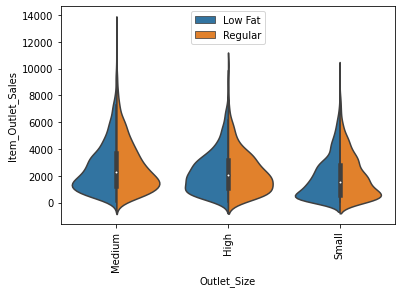

In [164]:
sb.violinplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data,hue='Item_Fat_Content',split='Item_Fat_Content')
plt.xticks(rotation=90)
plt.legend(loc=9)

In [165]:
tab=pd.pivot_table(data,index=["Item_Type"], columns=["Outlet_Size"], values='Item_Outlet_Sales', aggfunc='mean')

In [166]:
#pd.crosstab(data['Item_Type'],data['Outlet_Size'])
tab

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,2050.901134,2386.702771,1724.681911
Breads,2080.731528,2718.244814,2158.795546
Breakfast,2104.286508,2865.085356,1715.988533
Canned,2211.265203,2562.075105,2038.457667
Dairy,2453.181713,2725.360676,1900.495836
Frozen Foods,2214.096189,2612.229851,1895.489818
Fruits and Vegetables,2405.118103,2844.100923,1931.258454
Hard Drinks,2363.590000,2551.079280,1926.518932
Health and Hygiene,1953.042439,2475.142832,1929.155500


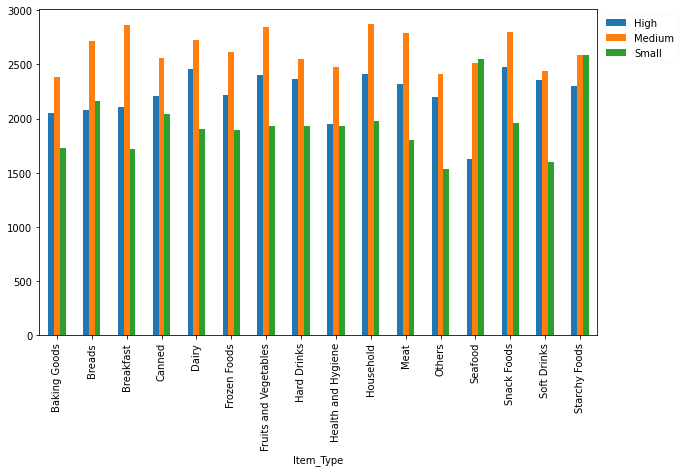

In [167]:
tab.plot(kind='bar',figsize=(10,6))
plt.legend(framealpha=0.1,bbox_to_anchor=(1,0,0.1,1))

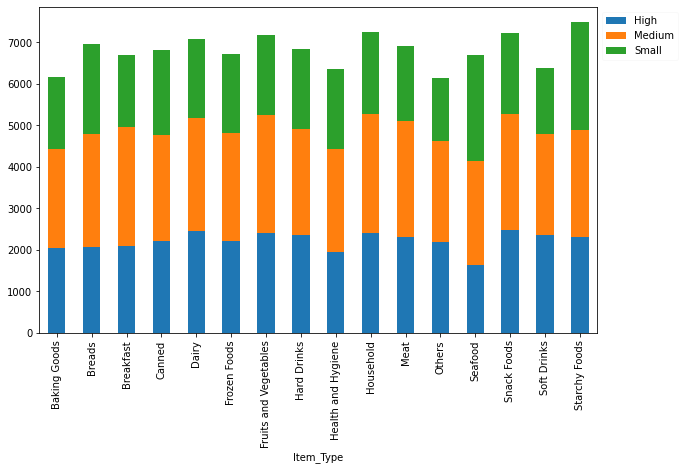

In [168]:
tab.plot(kind='bar',stacked=True,figsize=(10,6))
plt.legend(framealpha=0.1,bbox_to_anchor=(1,0,0.1,1))

In [169]:
x=data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

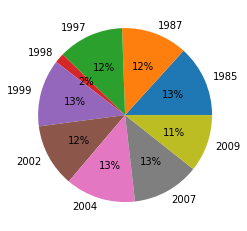

In [170]:
plt.pie(x,labels=x.index,autopct='%.0f%%')
plt.show()

In [172]:
data=pd.read_csv('k_circle_sales.csv')
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3


In [174]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [176]:
data.isnull().sum()/len(data)*100

Item_Identifier               0.000000
Item_Weight                   8.787985
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

In [179]:
(len(data)-len(data.dropna())) /len(data) *100

37.06441393875396

In [180]:
# Imputation
data['Item_Weight'].describe()

count    7774.000000
mean       11.676740
std         5.776851
min         0.000000
25%         7.720000
50%        11.800000
75%        16.500000
max        21.350000
Name: Item_Weight, dtype: float64

In [182]:
data['Item_Weight']=data['Item_Weight'].replace(0,np.nan)

In [183]:
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

<AxesSubplot:ylabel='Density'>

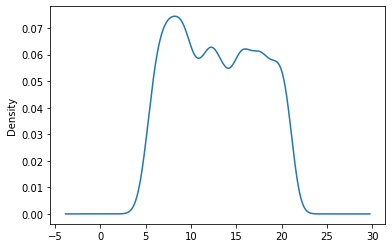

In [184]:
data['Item_Weight'].plot(kind='kde')

In [185]:
data['Item_Weight'].isnull().sum()

1463

<AxesSubplot:xlabel='Item_Weight'>

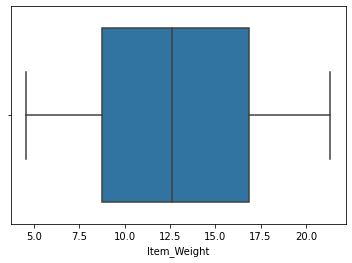

In [186]:
sb.boxplot(data['Item_Weight'])

In [188]:
data['Item_Weight'].fillna(data['Item_Weight'].mean()).isnull().sum()

0

In [189]:
desc=pd.DataFrame()
desc['Before']=data['Item_Weight'].describe()
desc['After']=data['Item_Weight'].fillna(data['Item_Weight'].mean()).describe()
desc

,Before,After
count,7060.000000,8523.000000
mean,12.857645,12.857645
std,4.643456,4.226124
min,4.555000,4.555000
25%,8.773750,9.310000
50%,12.600000,12.857645
75%,16.850000,16.000000
max,21.350000,21.350000


<AxesSubplot:ylabel='Density'>

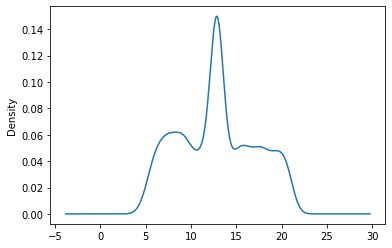

In [190]:
data['Item_Weight'].fillna(data['Item_Weight'].mean()).plot(kind='kde')

In [191]:
data.groupby(['Item_Identifier'])['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

<AxesSubplot:ylabel='Density'>

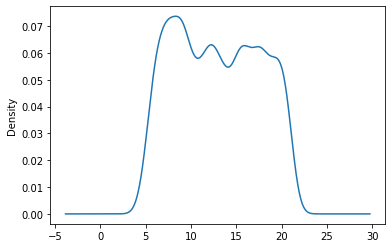

In [193]:
data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean')).plot(kind='kde')

In [194]:
data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean')).isnull().sum()

4

In [196]:
data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [198]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [200]:
data['Item_Weight'].isnull().sum()

0

In [201]:
data['Outlet_Size'].isnull().sum()

2410

In [202]:
data['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [205]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [207]:
data['Outlet_Location_Type'].unique()

array(['Tier 2', nan, 'Tier 3', '  --', 'Tier1', 'na', '  -', '?', 'NAN'],
      dtype=object)

In [209]:
data['Outlet_Location_Type']=data['Outlet_Location_Type'].replace({'  --':np.nan,'na':np.nan,'  -':np.nan,'?':np.nan,'NAN':np.nan})

In [210]:
data['Outlet_Location_Type'].value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
Name: Outlet_Location_Type, dtype: int64

In [213]:
data['Outlet_Location_Type'].mode()[0]

'Tier 2'

In [212]:
data['Outlet_Location_Type']=data['Outlet_Location_Type'].fillna(data['Outlet_Location_Type'].mode()[0])

In [214]:
data['Outlet_Location_Type'].value_counts()

Tier 2    5203
Tier1     2388
Tier 3     932
Name: Outlet_Location_Type, dtype: int64

In [215]:
data.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# if sales value is lessthan 2100, replace the missing value in Outlet size with ' Small'
# if sales value is greater than 2500, replace the missing value in Outlet size with ' Medium'
# Else replace the outlet size with 'High'  (sales is grater than 2100 and less than 2500 )